In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
PATH = "path/to/dataset"

In [27]:
SIZE = Image.open(PATH+os.listdir(PATH)[0]).size[::-1]  # shape of images
N = SIZE[0]*SIZE[1]                                     # dimensions of the weights matrix 
T_LEN = 10                                              # n. images for training
TRAIN_FILE = os.listdir(PATH)[:T_LEN]

In [4]:
W = np.zeros((N, N))                                    # init weights matrix

In [5]:
def img2bin(img):
    # convert rgb image to binary image (0, 255)
    threshold = 130 
    img = img.convert("L")
    width,height = img.size
    for x in range(width):
        for y in range(height):
            if img.getpixel((x,y)) < threshold:
                img.putpixel((x,y),0)
            else:
                img.putpixel((x,y),255)
    return img

In [6]:
for f in TRAIN_FILE:
    p = np.array(img2bin(Image.open(PATH+f))).flatten()    
    p = np.where(p > 0, 1, -1)                            # images values (-1, 1)
    W += np.outer(p, p)                                   # storing patterns  

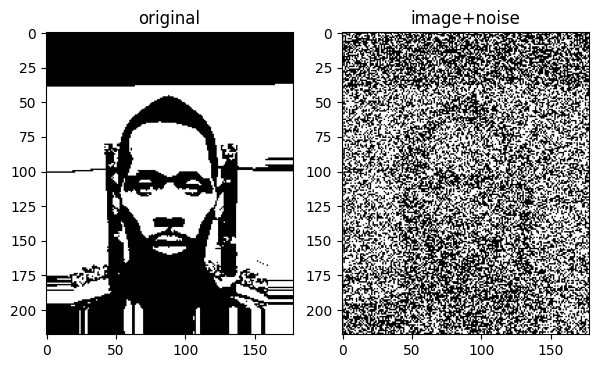

In [37]:
sample_idx = 1
NOISE = 0.4                                          
fig, axes = plt.subplots(1, 2, figsize=(7, 5))
ax1, ax2 = axes
sample = np.array(img2bin(Image.open(PATH+TRAIN_FILE[sample_idx]))).flatten()
ax1.imshow(sample.reshape(SIZE), cmap="grey")
ax1.set_title("original")
sample = np.where(sample > 0, 1, -1)
noise = np.random.rand(*sample.shape)
sample = np.where(noise < NOISE, -sample, sample)
ax2.imshow(sample.reshape(SIZE), cmap="grey")
ax2.set_title("image+noise")
plt.show()

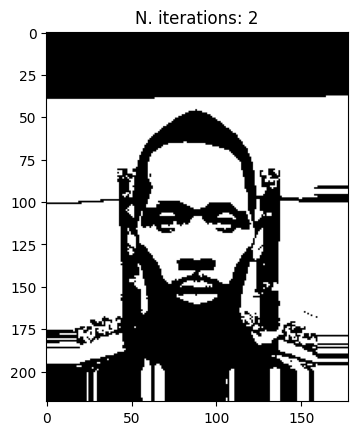

In [38]:
curr = sample
next_state = np.where(W @ curr > 0, 1, -1)               # calculating step n.1 
i = 1

while not np.array_equal(next_state, curr) and i < 50:   # predicting step n. (i + 1) until min energy reached
    i += 1
    curr = next_state
    next_state = np.where(W @ curr > 0, 1, -1)
    
plt.imshow(next_state.reshape(*SIZE), cmap="grey")
plt.title(f"N. iterations: {i}")
plt.show()

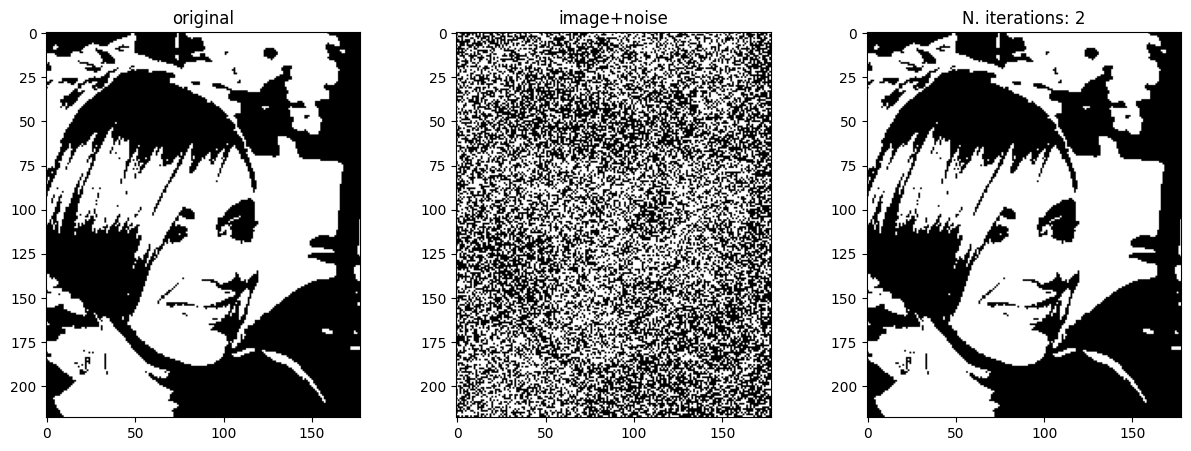

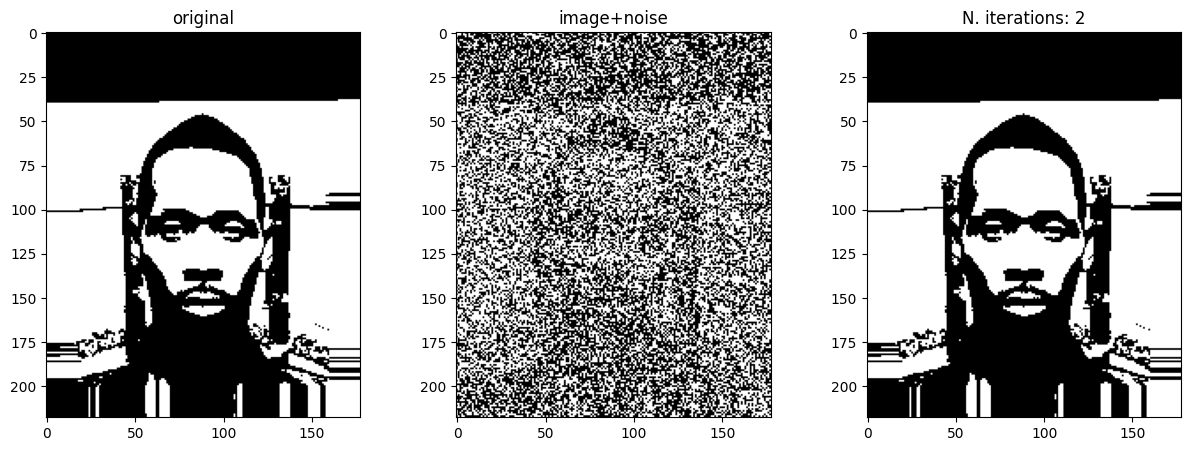

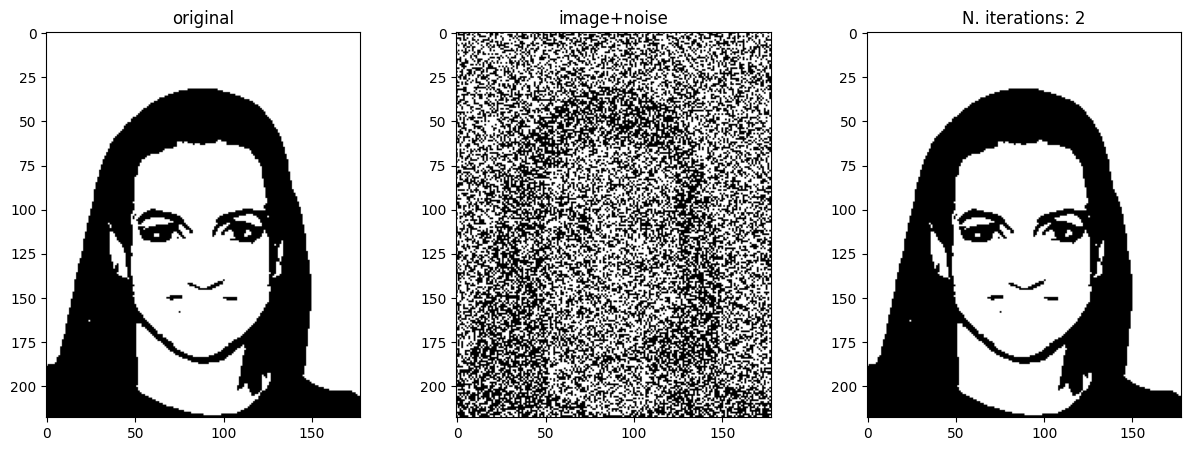

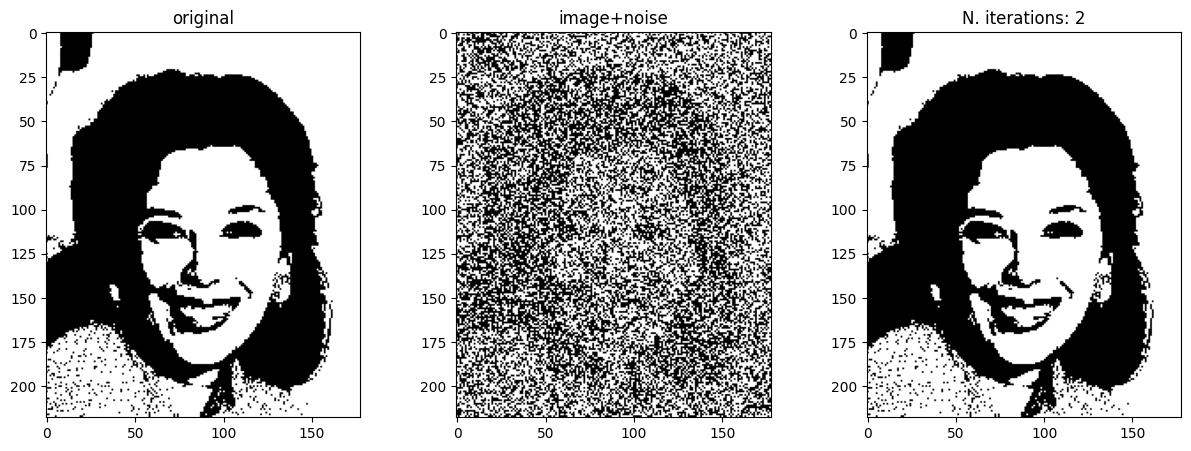

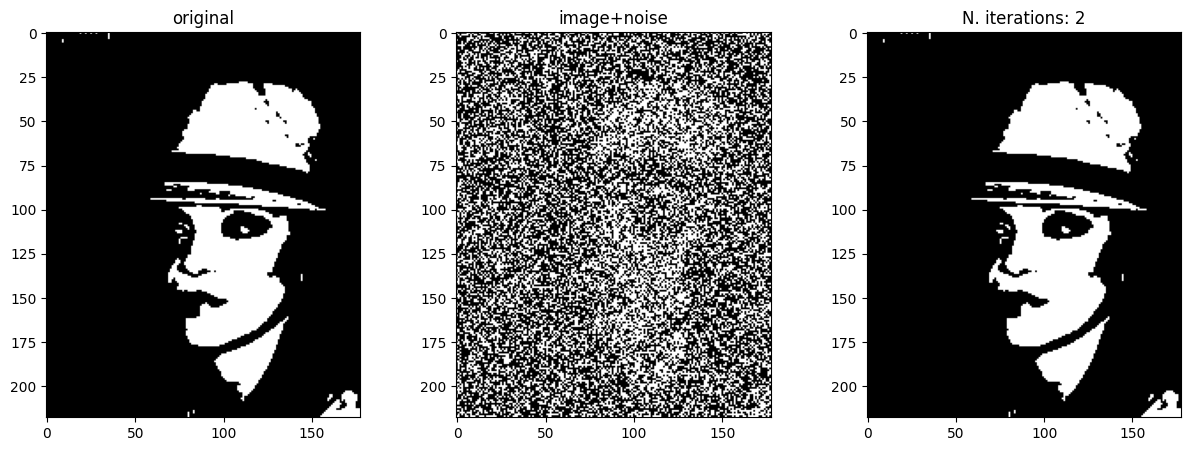

In [41]:
for f in TRAIN_FILE[:5]:
    NOISE = 0.4
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    ax1, ax2, ax3 = axes
    sample = np.array(img2bin(Image.open(PATH+f))).flatten()
    ax1.imshow(sample.reshape(SIZE), cmap="grey")
    ax1.set_title("original")
    sample = np.where(sample > 0, 1, -1)
    noise = np.random.rand(*sample.shape)
    sample = np.where(noise < NOISE, -sample, sample)
    ax2.imshow(sample.reshape(SIZE), cmap="grey")
    ax2.set_title("image+noise")
    curr = sample
    next_state = np.where(W @ curr > 0, 1, -1)
    i = 1
    while not np.array_equal(next_state, curr) and i < 50: 
        i += 1
        curr = next_state
        next_state = np.where(W @ curr > 0, 1, -1)
        
    ax3.imshow(next_state.reshape(*SIZE), cmap="grey")
    ax3.set_title(f"N. iterations: {i}")
    plt.show()